In [1]:
# Load essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
import kagglehub

path = kagglehub.dataset_download("prevek18/ames-housing-dataset")

In [3]:
import os

# List files inside the downloaded dataset folder
print("Files in dataset folder:")
print(os.listdir(path))


Files in dataset folder:
['AmesHousing.csv']


In [4]:
import pandas as pd
import os

# Build full path to the file
csv_file_path = os.path.join(path, 'AmesHousing.csv')

# Load the dataset
df = pd.read_csv(csv_file_path)

# Preview the data
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Missing Values:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


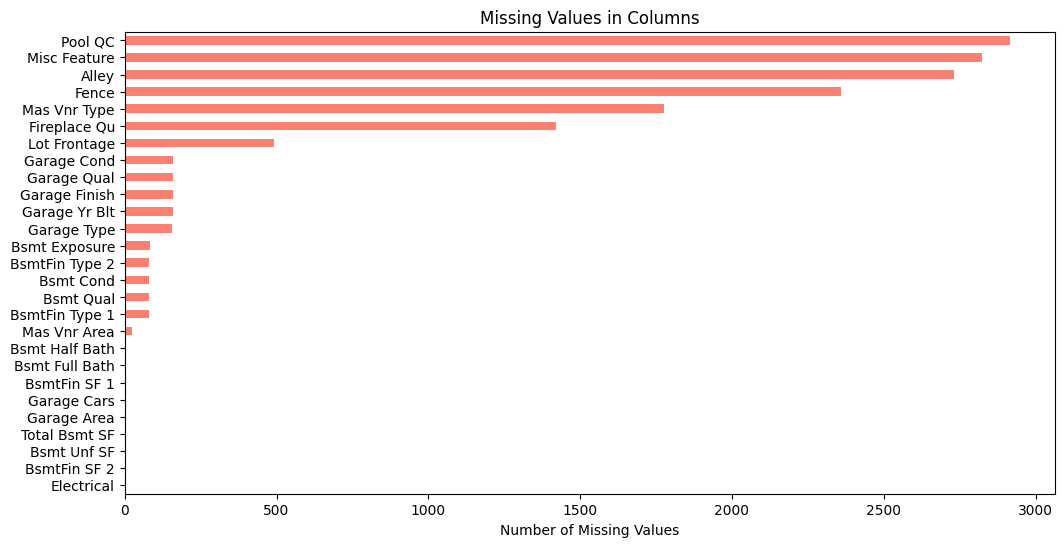

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing Values:")
print(missing)

# Plot missing values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
missing.plot(kind='barh', color='salmon')
plt.title('Missing Values in Columns')
plt.xlabel('Number of Missing Values')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


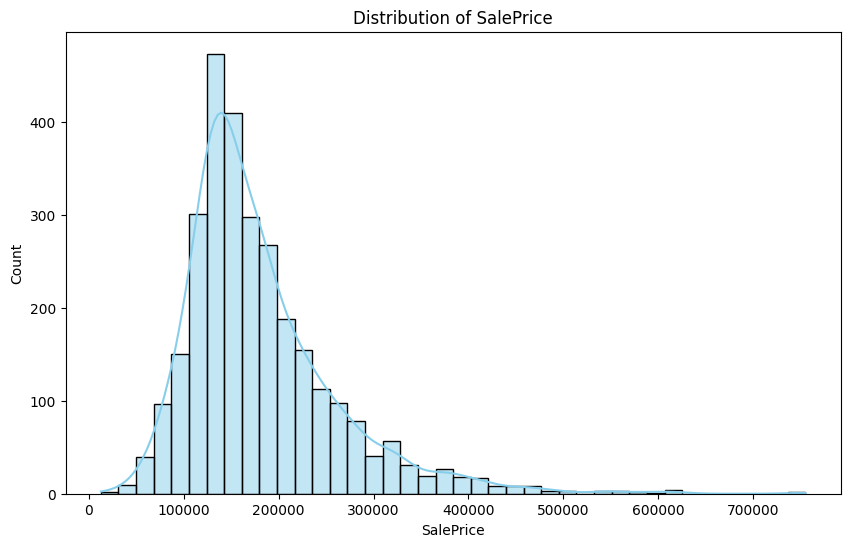

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


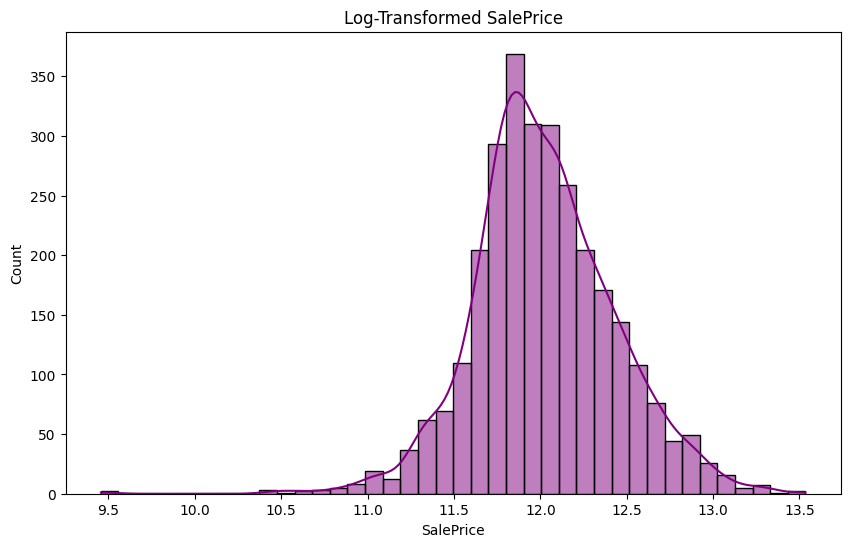

Skewness (original): 1.74
Skewness (log1p): -0.01


In [6]:
import seaborn as sns
from scipy.stats import skew
import numpy as np

# Raw distribution
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=40, color='skyblue')
plt.title("Distribution of SalePrice")
plt.show()

# Log-transformed distribution
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['SalePrice']), kde=True, bins=40, color='purple')
plt.title("Log-Transformed SalePrice")
plt.show()

# Skewness
print(f"Skewness (original): {skew(df['SalePrice']):.2f}")
print(f"Skewness (log1p): {skew(np.log1p(df['SalePrice'])):.2f}")


Top correlated features with SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


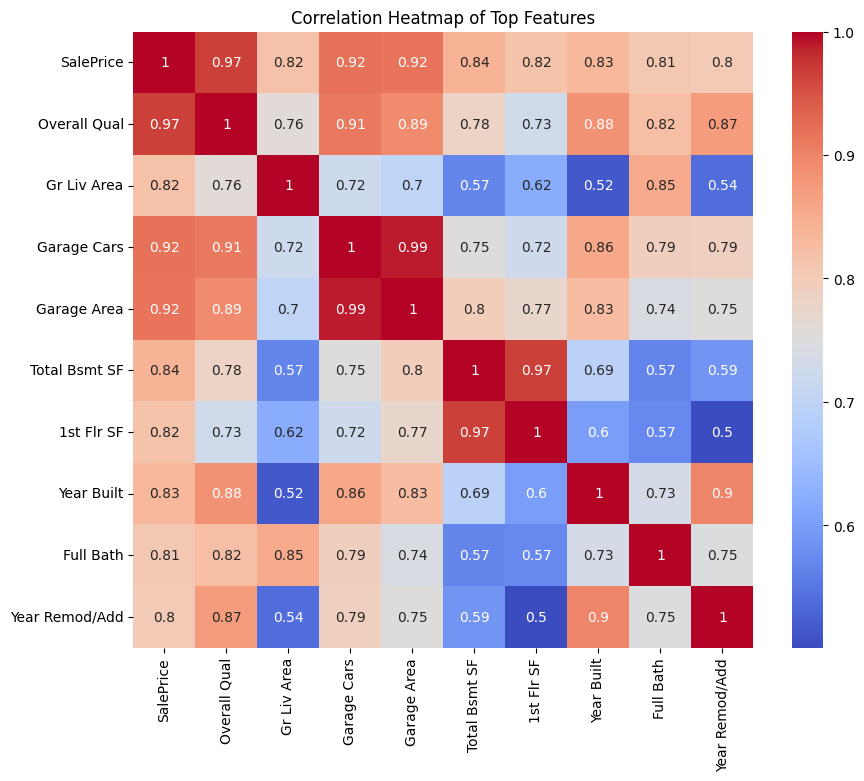

In [7]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Top 10 correlated features
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("Top correlated features with SalePrice:")
print(top_corr)

# Heatmap of top correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()


In [8]:
# Separate by types
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features ({len(categorical)}):\n", categorical)
print(f"\nNumerical features ({len(numerical)}):\n", numerical)


Categorical features (43):
 ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

Numerical features (39):
 ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 

2. Preprocessing and Feature Engineering
Handle missing values
Encode categorical variables
Transform skewed numerical variables
Create new features (if needed)
Split into X (features) and y (target)

In [9]:
# Separate column types
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values
df[categorical_cols] = df[categorical_cols].fillna("None")
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Check again to confirm
print("Missing values remaining:", df.isnull().sum().sum())



Missing values remaining: 0


In [10]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)


Shape after encoding: (2930, 279)


In [11]:
from scipy.stats import skew
import numpy as np

# Identify skewed numeric features
skewed_feats = df_encoded[numerical_cols].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]

print(f"Skewed features: {len(skewed_feats)}")

# Apply log1p transformation
for feature in skewed_feats.index:
    df_encoded[feature] = np.log1p(df_encoded[feature])


Skewed features: 23


In [12]:
# Define target
y = df_encoded['SalePrice']

# Drop target from features
X = df_encoded.drop('SalePrice', axis=1)

print("✅ Shapes — X:", X.shape, ", y:", y.shape)


✅ Shapes — X: (2930, 278) , y: (2930,)


3. Model Training
Fit at least two models:

Linear Regression,
Random Forest Regressor (or any tree-based model),
Evaluate each using RMSE and R² on the test set.

In [13]:
# Required imports (already imported earlier, but here for clarity)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2344, 278), Test shape: (586, 278)


In [15]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("📘 Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.4f}")


📘 Linear Regression Results:
RMSE: 0.14
R²:   0.9007


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Model Comparison Table
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf]
})

results


,Model,RMSE,R²
0,Linear Regression,0.135543,0.900709
1,Random Forest,0.122542,0.918842


4. Hyperparameter Tuning
Use GridSearchCV to tune:

Ridge Regression (alpha),
Random Forest (max_depth, n_estimators),
Report best parameters and RMSE.

In [17]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [18]:
# Define Ridge model and param grid
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Best model
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Evaluation
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("📘 Ridge Regression Grid Search")
print("Best alpha:", ridge_grid.best_params_['alpha'])
print(f"Test RMSE: {rmse_ridge:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36847e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49969e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47758e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46101e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

📘 Ridge Regression Grid Search
Best alpha: 10
Test RMSE: 0.11


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.74251e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.70967e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.60223e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.73771e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [19]:
# Define RF model and param grid
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None]
}

# Grid search
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

# Evaluation
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf_best))

print("\n🌲 Random Forest Grid Search")
print("Best Params:", rf_grid.best_params_)
print(f"Test RMSE: {rmse_rf_best:.2f}")



🌲 Random Forest Grid Search
Best Params: {'max_depth': 20, 'n_estimators': 200}
Test RMSE: 0.12


In [20]:
results = pd.DataFrame({
    "Model": ["Ridge Regression (GridSearch)", "Random Forest (GridSearch)"],
    "Best Params": [ridge_grid.best_params_, rf_grid.best_params_],
    "Test RMSE": [rmse_ridge, rmse_rf_best]
})

results



,Model,Best Params,Test RMSE
0,Ridge Regression (GridSearch),{'alpha': 10},0.108588
1,Random Forest (GridSearch),"{'max_depth': 20, 'n_estimators': 200}",0.122180


5. Model Evaluation
Compare models based on:

RMSE,
R²,
Strengths and weaknesses,
Which model would you deploy in practice, and why?

In [21]:
# Example of calculating RMSE and R2 for Ridge Regression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_ridge = best_ridge.predict(X_test)   # best_ridge from your GridSearchCV
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Similarly calculate for Linear Regression and Random Forest if you haven't:
y_pred_lr = lr.predict(X_test)    # lr = LinearRegression model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

y_pred_rf = best_rf.predict(X_test)  # best_rf from GridSearchCV
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


In [22]:
# Assume these variables are already computed from your trained models:
# rmse_lr, r2_lr: Linear Regression
# rmse_ridge, r2_ridge: Ridge Regression
# rmse_rf, r2_rf: Random Forest

# 1. Print RMSE and R² scores
print("Model Performance Comparison:\n")
print(f"Linear Regression  --> RMSE: {rmse_lr:.2f}, R²: {r2_lr:.4f}")
print(f"Ridge Regression   --> RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.4f}")
print(f"Random Forest      --> RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")

print("\n" + "="*40 + "\n")

# 2. Strengths and Weaknesses Summary
print("Strengths and Weaknesses:\n")

print("Linear Regression:")
print("- Strengths: Simple, fast, interpretable.")
print("- Weaknesses: Assumes linearity, sensitive to outliers and multicollinearity.\n")

print("Ridge Regression:")
print("- Strengths: Regularization reduces overfitting, more robust than linear regression.")
print("- Weaknesses: Still linear, limited for complex relationships.\n")

print("Random Forest:")
print("- Strengths: Captures non-linear interactions, robust to outliers, high accuracy.")
print("- Weaknesses: Less interpretable, slower training, more resource intensive.\n")

print("="*40 + "\n")

# 3. Deployment Recommendation
if rmse_rf < rmse_ridge and rmse_rf < rmse_lr:
    recommended = "Random Forest"
elif rmse_ridge < rmse_lr:
    recommended = "Ridge Regression"
else:
    recommended = "Linear Regression"

print(f"Recommended model to deploy: {recommended}")
print("Reason: It offers the best trade-off between accuracy and model complexity.")



Model Performance Comparison:

Linear Regression  --> RMSE: 0.14, R²: 0.9007
Ridge Regression   --> RMSE: 0.11, R²: 0.9363
Random Forest      --> RMSE: 0.12, R²: 0.9193


Strengths and Weaknesses:

Linear Regression:
- Strengths: Simple, fast, interpretable.
- Weaknesses: Assumes linearity, sensitive to outliers and multicollinearity.

Ridge Regression:
- Strengths: Regularization reduces overfitting, more robust than linear regression.
- Weaknesses: Still linear, limited for complex relationships.

Random Forest:
- Strengths: Captures non-linear interactions, robust to outliers, high accuracy.
- Weaknesses: Less interpretable, slower training, more resource intensive.


Recommended model to deploy: Ridge Regression
Reason: It offers the best trade-off between accuracy and model complexity.
